In [1]:
using DataStructures
using JLD2
using FileIO
using PyCall
include("phylowrap.jl")

buildtree (generic function with 7 methods)

In [2]:
py"""
import sys
sys.path.insert(0, "/Users/lbq/goof/PhyloWrap.jl/")
"""

comparetree = pyimport("treecompare")

PyObject <module 'treecompare' from '/Users/lbq/goof/PhyloWrap.jl/treecompare.py'>

In [3]:
results = glob("results/*.jld2")

8-element Array{String,1}:
 "results/analysis1.jld2"
 "results/analysis2.jld2"
 "results/analysis3.jld2"
 "results/analysis4.jld2"
 "results/mpboot1.jld2"
 "results/mpboot2.jld2"
 "results/store_run1.jld2"
 "results/upgma.jld2"

In [4]:
store = OrderedDict{ExpKey, Union{Missing, Tuple{Float64, PhyTree}}}()
for r in results
    s = load(r)["store"]
    for (k, v) in s
        if haskey(store, k)
            @show k
        end
        store[k] = v
    end
end

In [5]:
keys(store)

Base.KeySet for a OrderedDict{ExpKey,Union{Missing, Tuple{Float64,String}}} with 400 entries. Keys:
  ExpKey("datasets/1000M1/R00/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R01/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R02/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R03/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R04/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R05/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R06/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R07/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R08/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R09/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R10/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R11/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R12/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets/1000M1/R13/rose.aln.true.phy", IQTree(GTR))
  ExpKey("datasets

In [6]:
using DataFrames
using Gadfly

In [7]:
const D1000M1 = Dataset("datasets/1000M1")
const D1000M4 = Dataset("datasets/1000M4")
truths = Dict()
for e in vcat(allinputs(D1000M1),allinputs(D1000M4))
    p = replace(e, "rose.aln.true.phy" => "rose.tt")
    truths[e] = read(p, String)
end
truths

Dict{Any,Any} with 40 entries:
  "datasets/1000M4/R14/ros… => "(((((((SCI,(SIAF,SCHA)),((SHDC,((SBJD,SDCA),(SH…
  "datasets/1000M1/R02/ros… => "(((SFCG,(((((SHGD,(SGC,((SFJH,SIDA),SDC))),((SF…
  "datasets/1000M1/R14/ros… => "(((((((((SHGB,(SFAD,SBHB)),(SDDF,(SHFC,SJCH))),…
  "datasets/1000M4/R03/ros… => "((((((((((SIIG,(SBCG,(SGB,SJAD))),(SFAD,SFAE)),…
  "datasets/1000M1/R13/ros… => "(((((((((SFJG,SDBF),SCEJ),(SCEI,(SDGE,SBG))),((…
  "datasets/1000M1/R18/ros… => "(((((((SGB,(SHIE,SHAE)),SCDF),(SBHJ,SFII)),(((S…
  "datasets/1000M1/R12/ros… => "(((((((SJFE,(((SJCD,(SFDJ,SHE)),(SIEF,(SGCG,SGG…
  "datasets/1000M1/R07/ros… => "(((((((((((SFAJ,SGBC),(SEI,((SHEC,((SCEE,SEF),S…
  "datasets/1000M1/R04/ros… => "(((SHBF,(((SGEE,(SJCB,(SEHG,(SDAC,SJAB)))),SJAG…
  "datasets/1000M1/R06/ros… => "(((((((((SJJC,(SFJC,SBAA)),(SDFC,SGJB)),((SCGG,…
  "datasets/1000M1/R15/ros… => "(((((((((SEFB,SDDJ),SCFE),SIGB),SFJF),((SJDG,(S…
  "datasets/1000M1/R09/ros… => "(((((((((SEAE,(SBI,SEIH)),(((SCEA,SFED),((SJC,

In [8]:
function isless(x :: T, y :: T) where {T<:TreeMethod}
    isless(TreeMethod2Speed[x], TreeMethod2Speed[y])
end

methods = collect(Set(map(i -> i.method, collect(keys(store)))))

10-element Array{TreeMethod,1}:
 BME(PDis)
 BME(JC)
 NJ(PDis)
 FastTree2(JCM)
 IQTree(JCM)
 UPGMA(PDis)
 NJ(JC)
 IQTree(GTR)
 FastTree2(GTR)
 MPBoot()

In [9]:
inputs = sort(collect(keys(truths)))

40-element Array{Any,1}:
 "datasets/1000M1/R00/rose.aln.true.phy"
 "datasets/1000M1/R01/rose.aln.true.phy"
 "datasets/1000M1/R02/rose.aln.true.phy"
 "datasets/1000M1/R03/rose.aln.true.phy"
 "datasets/1000M1/R04/rose.aln.true.phy"
 "datasets/1000M1/R05/rose.aln.true.phy"
 "datasets/1000M1/R06/rose.aln.true.phy"
 "datasets/1000M1/R07/rose.aln.true.phy"
 "datasets/1000M1/R08/rose.aln.true.phy"
 "datasets/1000M1/R09/rose.aln.true.phy"
 "datasets/1000M1/R10/rose.aln.true.phy"
 "datasets/1000M1/R11/rose.aln.true.phy"
 "datasets/1000M1/R12/rose.aln.true.phy"
 ⋮
 "datasets/1000M4/R08/rose.aln.true.phy"
 "datasets/1000M4/R09/rose.aln.true.phy"
 "datasets/1000M4/R10/rose.aln.true.phy"
 "datasets/1000M4/R11/rose.aln.true.phy"
 "datasets/1000M4/R12/rose.aln.true.phy"
 "datasets/1000M4/R13/rose.aln.true.phy"
 "datasets/1000M4/R14/rose.aln.true.phy"
 "datasets/1000M4/R15/rose.aln.true.phy"
 "datasets/1000M4/R16/rose.aln.true.phy"
 "datasets/1000M4/R17/rose.aln.true.phy"
 "datasets/1000M4/R18/rose.al

In [10]:
outputs = DataFrame()
for m in methods
    outputs[string(m)] = [store[ExpKey(inputs[i], m)] for i=1:40 ]
end
outputs

40×10 DataFrame. Omitted printing of 10 columns
│ Row │ │     │ ├─────┼
│ 1   │ │ 2   │ │ 3   │ │ 4   │ │ 5   │ │ 6   │ │ 7   │ │ 8   │ │ 9   │ │ 10  │ 
⋮
│ 30  │ │ 31  │ │ 32  │ │ 33  │ │ 34  │ │ 35  │ │ 36  │ │ 37  │ │ 38  │ │ 39  │ │ 40  │

In [11]:
errs = DataFrame()
for m in methods
    rs = [store[ExpKey(inputs[i], m)] for i=1:40 ]
    r = []
    for (i, e) in enumerate(rs)
        p = inputs[i]
        t = truths[p]
        if ismissing(e)
            push!(r, e)
        else
            er = comparetree.compareTreesFromString(t, e[2])
            push!(r, er)
        end
    end
    errs[string(m)] = r
end
errs

,BME(PDis),BME(JC)
,Any,Any
1,"(204, 203, 0.204819, 0.204614, 0.204215)","(205, 204, 0.205823, 0.205617, 0.205218)"
2,"(205, 199, 0.206862, 0.205617, 0.203219)","(223, 217, 0.225025, 0.223671, 0.221328)"
3,"(232, 228, 0.233635, 0.232698, 0.231156)","(223, 219, 0.224572, 0.223671, 0.222111)"
4,"(216, 212, 0.217523, 0.21665, 0.215075)","(206, 202, 0.207452, 0.20662, 0.205025)"
5,"(284, 278, 0.286579, 0.284855, 0.282696)","(270, 264, 0.272452, 0.270812, 0.268612)"
6,"(209, 205, 0.210473, 0.209629, 0.20804)","(200, 196, 0.20141, 0.200602, 0.198995)"
7,"(211, 207, 0.212487, 0.211635, 0.21005)","(203, 199, 0.204431, 0.203611, 0.20201)"
8,"(228, 223, 0.229839, 0.228686, 0.226747)","(229, 224, 0.230847, 0.229689, 0.227753)"
9,"(234, 229, 0.235887, 0.234704, 0.23278)","(225, 220, 0.226815, 0.225677, 0.223731)"


,BME(JC),BME(PDis),FastTree2(GTR),FastTree2(JCM),IQTree(GTR),IQTree(JCM),MPBoot()
,Float64,Float64,Float64,Float64,Float64,Float64,Float64?
1,0.205823,0.204819,0.0893574,0.105422,0.12249,0.163655,0.213855
2,0.225025,0.206862,0.103935,0.116044,0.137235,0.140262,0.215943
3,0.224572,0.233635,0.10574,0.129909,0.165156,0.163142,0.219537
4,0.207452,0.217523,0.0906344,0.119839,0.137966,0.159114,0.223565
5,0.272452,0.286579,0.141271,0.178607,0.169526,0.221998,0.279516
6,0.20141,0.210473,0.0906344,0.101712,0.119839,0.129909,0.195368
7,0.204431,0.212487,0.104733,0.117825,0.15005,0.156093,0.212487
8,0.230847,0.229839,0.120968,0.132056,0.153226,0.174395,0.230847
9,0.226815,0.235887,0.114919,0.137097,0.162298,0.164315,0.22379


In [24]:
errs_sorted = permutecols!(errs, sort(names(errs)))
rf_rate = _3.(errs_sorted)

,BME(JC),BME(PDis),FastTree2(GTR),FastTree2(JCM),IQTree(GTR),IQTree(JCM),MPBoot()
,Float64,Float64,Float64,Float64,Float64,Float64,Float64?
1,0.205823,0.204819,0.0893574,0.105422,0.12249,0.163655,0.213855
2,0.225025,0.206862,0.103935,0.116044,0.137235,0.140262,0.215943
3,0.224572,0.233635,0.10574,0.129909,0.165156,0.163142,0.219537
4,0.207452,0.217523,0.0906344,0.119839,0.137966,0.159114,0.223565
5,0.272452,0.286579,0.141271,0.178607,0.169526,0.221998,0.279516
6,0.20141,0.210473,0.0906344,0.101712,0.119839,0.129909,0.195368
7,0.204431,0.212487,0.104733,0.117825,0.15005,0.156093,0.212487
8,0.230847,0.229839,0.120968,0.132056,0.153226,0.174395,0.230847
9,0.226815,0.235887,0.114919,0.137097,0.162298,0.164315,0.22379


In [25]:
M1 = @view rf_rate[1:20, names(rf_rate)]
M4 = @view rf_rate[21:40, names(rf_rate)]

,BME(JC),BME(PDis),FastTree2(GTR),FastTree2(JCM),IQTree(GTR),IQTree(JCM),MPBoot()
,Float64,Float64,Float64,Float64,Float64,Float64,Float64?
1,0.149485,0.168041,0.0876289,0.0938144,0.0876289,0.103093,0.127835
2,0.121926,0.143443,0.0604508,0.0686475,0.057377,0.067623,0.0993852
3,0.141225,0.15784,0.07892,0.0851506,0.0809969,0.0934579,0.111111
4,0.129803,0.144341,0.0872274,0.0934579,0.0893043,0.0965732,0.115265
5,0.128099,0.141529,0.071281,0.0754132,0.0847107,0.0960744,0.114669
6,0.121926,0.144467,0.0727459,0.0768443,0.0717213,0.085041,0.0963115
7,0.157303,0.184883,0.0776302,0.0786517,0.0847804,0.0858018,0.118488
8,0.137155,0.162743,0.0859775,0.0962129,0.0880246,0.0992835,0.116684
9,0.123218,0.142566,0.0672098,0.0682281,0.0753564,0.0763747,0.0977597


In [45]:
identity(x,y) = x
using Latexify
print(string(latexify(identity(describe(M4),[:mean])[["variable", "mean"]], fmt = x -> round(x, sigdigits=3),latex=false,env=:mdtable)))

|       variable |   mean |
| --------------:| ------:|
|        BME(JC) |  0.139 |
|      BME(PDis) |  0.159 |
| FastTree2(GTR) | 0.0772 |
| FastTree2(JCM) | 0.0826 |
|    IQTree(GTR) | 0.0819 |
|    IQTree(JCM) | 0.0903 |
|       MPBoot() |  0.116 |
|         NJ(JC) |  0.163 |
|       NJ(PDis) |  0.196 |
|    UPGMA(PDis) |  0.256 |


In [27]:
sort(describe(M4),[:mean])

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Union…,Type
1,FastTree2(GTR),0.0771566,0.0604508,0.0767242,0.0940083,,,Float64
2,IQTree(GTR),0.081879,0.057377,0.0822941,0.100104,,,Float64
3,FastTree2(JCM),0.0826048,0.0682281,0.0808605,0.100104,,,Float64
4,IQTree(JCM),0.0903179,0.067623,0.0908158,0.111575,,,Float64
5,MPBoot(),0.115727,0.0963115,0.115051,0.134694,,0,"Union{Missing, Float64}"
6,BME(JC),0.138788,0.121553,0.140511,0.159091,,,Float64
7,BME(PDis),0.158855,0.14096,0.157894,0.186983,,,Float64
8,NJ(JC),0.162886,0.144467,0.164355,0.18905,,,Float64
9,NJ(PDis),0.195562,0.170082,0.196269,0.214876,,,Float64


In [46]:
function errs_df(x)
    df = DataFrame()
    r1 = []
    r2 = []
    for n in names(x)
        for i in 1:nrow(x)
            e = x[i, n]
            if ismissing(e)
                continue
            end
            push!(r1, ismissing(e) ? NaN : e)
            push!(r2, n)
        end
    end
    df.RFE = r1
    df.Method = r2
    df
end

,RFE,Method
,Any,Any
1,0.149485,BME(JC)
2,0.121926,BME(JC)
3,0.141225,BME(JC)
4,0.129803,BME(JC)
5,0.128099,BME(JC)
6,0.121926,BME(JC)
7,0.157303,BME(JC)
8,0.137155,BME(JC)
9,0.123218,BME(JC)


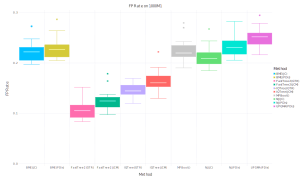

In [56]:
set_default_plot_size(30cm, 18.54cm)

plot(errs_df(M1),x=:Method, y=:RFE, Guide.ylabel("FP Rate"), Geom.boxplot,
    Theme(default_color="MidnightBlue"), color=:Method, Guide.title("FP Rate on 1000M1"))

In [66]:
import Cairo, Fontconfig
set_default_plot_size(25cm, 15cm)
errs_sorted = permutecols!(errs, sort(names(errs)))
for i in 3:5
    transformer(x) = ismissing(x) ? x : x[i]
    rf_rate = transformer.(errs_sorted)
    M1 = @view rf_rate[1:20, names(rf_rate)]
    M4 = @view rf_rate[21:40, names(rf_rate)]
    humanize = ["","","FP Rate","FN Rate", "RF Rate"]
    println(i)
    println(string(latexify(identity(describe(M1),[:mean])[["variable", "mean"]], fmt = x -> round(x, sigdigits=3),latex=false,env=:mdtable)))
    println(string(latexify(identity(describe(M4),[:mean])[["variable", "mean"]], fmt = x -> round(x, sigdigits=3),latex=false,env=:mdtable)))
    println("")
    vocab = humanize[i]
    p = plot(errs_df(M1),x=:Method, y=:RFE, Guide.ylabel(vocab), Geom.boxplot,
        Theme(default_color="MidnightBlue"), color=:Method, Guide.title("$vocab on 1000M1"))
    draw(PNG("plot_$(i)_M1.png", 25cm, 15cm), p)
    p = plot(errs_df(M4),x=:Method, y=:RFE, Guide.ylabel(vocab), Geom.boxplot,
        Theme(default_color="MidnightBlue"), color=:Method, Guide.title("$vocab on 1000M4"))
    draw(PNG("plot_$(i)_M4.png", 25cm, 15cm), p)
end

3
|       variable |  mean |
| --------------:| -----:|
|        BME(JC) | 0.224 |
|      BME(PDis) | 0.229 |
| FastTree2(GTR) | 0.107 |
| FastTree2(JCM) | 0.125 |
|    IQTree(GTR) | 0.147 |
|    IQTree(JCM) | 0.164 |
|       MPBoot() | 0.224 |
|         NJ(JC) | 0.213 |
|       NJ(PDis) | 0.233 |
|    UPGMA(PDis) |  0.25 |

|       variable |   mean |
| --------------:| ------:|
|        BME(JC) |  0.139 |
|      BME(PDis) |  0.159 |
| FastTree2(GTR) | 0.0772 |
| FastTree2(JCM) | 0.0826 |
|    IQTree(GTR) | 0.0819 |
|    IQTree(JCM) | 0.0903 |
|       MPBoot() |  0.116 |
|         NJ(JC) |  0.163 |
|       NJ(PDis) |  0.196 |
|    UPGMA(PDis) |  0.256 |


4
|       variable |  mean |
| --------------:| -----:|
|        BME(JC) | 0.223 |
|      BME(PDis) | 0.228 |
| FastTree2(GTR) | 0.107 |
| FastTree2(JCM) | 0.125 |
|    IQTree(GTR) | 0.146 |
|    IQTree(JCM) | 0.163 |
|       MPBoot() | 0.224 |
|         NJ(JC) | 0.212 |
|       NJ(PDis) | 0.232 |
|    UPGMA(PDis) | 0.249 |

|       

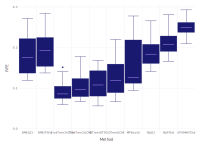

In [22]:
plot(errs_df(rf_rate),x=:Method, y=:RFE, Geom.boxplot,
    Theme(default_color="MidnightBlue"))

In [67]:
writetable("outputs.csv", outputs)

LoadError: UndefVarError: writetable not defined

In [69]:
import Pkg; Pkg.add("CSV")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [336ed68f] + CSV v0.7.7
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [70]:
using CSV

In [71]:
CSV.write("outputs.csv", outputss)

"outputs.csv"

In [72]:
!open .

LoadError: syntax: space before "." not allowed in "open ." at In[72]:1